In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import random
import torch

seed = 42
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
data = pd.read_csv('data.csv', encoding='gbk', low_memory=False)
data

,Cell_architecture,Substrate_stack_sequence,ETL_stack_sequence,ETL_additives_compounds,ETL_deposition_procedure,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_none_stoichiometry_components_in_excess,Perovskite_additives_compounds,Perovskite_deposition_procedure,DMF_DMSO,Perovskite_deposition_quenching_media,Perovskite_deposition_quenching_media_additives_compounds,Perovskite_deposition_solvent_annealing,HTL_stack_sequence,HTL_additives_compounds,HTL_deposition_procedure,Backcontact_stack_sequence,Backcontact_thickness_list,Backcontact_deposition_procedure,JV_default_Voc,JV_default_Jsc,JV_default_FF,JV_default_PCE,Perovskite_deposition_solvents_IPA,Perovskite_deposition_thermal_annealing
0,nip,SLG | FTO,TiO2-c | TiO2-nw,Undoped,CBD | Hydrothermal,1,none,Cl,Spin-coating,1.000,Undoped,Undoped,0,Spiro-MeOTAD,Li-TFSI; TPB,Spin-coating,Au,80.0,Evaporation,0.800,20.40,0.630,10.30,0,110-60.0
1,nip,SLG | FTO,TiO2-c | TiO2-nw,Er,CBD | Hydrothermal,1,none,Cl,Spin-coating,1.000,Undoped,Undoped,0,Spiro-MeOTAD,Li-TFSI; TPB,Spin-coating,Au,80.0,Evaporation,0.830,21.30,0.640,11.50,0,110-60.0
2,nip,SLG | FTO,TiO2-c | TiO2-nw,Er; Yb,CBD | Hydrothermal,1,none,Cl,Spin-coating,1.000,Undoped,Undoped,0,Spiro-MeOTAD,Li-TFSI; TPB,Spin-coating,Au,80.0,Evaporation,0.870,21.70,0.660,12.90,0,110-60.0
3,nip,SLG | FTO,TiO2-c,Undoped,Spin-coating,1,none,Cl,Spin-coating,1.000,Undoped,Undoped,0,Spiro-MeOTAD,Li-TFSI; TPB,Spin-coating,Au,60.0,Evaporation,0.913,15.77,0.700,10.00,0,100.0-5.0
4,nip,SLG | FTO,TiO2-c | TiO2-mp,TiCl4,Spin-coating | Spin-coating,1,MA,Undoped,Spin-coating,1.000,Undoped,Undoped,0,Spiro-MeOTAD,Li-TFSI; TPB,Spin-coating,Au,80.0,Evaporation,1.080,21.70,0.725,17.00,0,100.0-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,nip,SLG | FTO,TiO2-c | TiO2-mp,Li-TFSI,Spray-pyrolys | Spin-coating,1,none,Az,Spray-coating,1.000,Undoped,Undoped,0,Spiro-MeOTAD,FK209; Li-TFSI; TBP,Spin-coating,Au,100.0,Evaporation,0.925,18.10,0.650,11.10,1,100.0-60.0
3521,nip,SLG | FTO,TiO2-c | TiO2-mp,Li-TFSI,Spray-pyrolys | Spin-coating,1,none,Az,Spin-coating,1.000,Undoped,Undoped,0,Spiro-MeOTAD,FK209; Li-TFSI; TBP,Spin-coating,Au,100.0,Evaporation,0.909,19.05,0.690,13.00,1,100.0-60.0
3522,nip,SLG | FTO,TiO2-c | TiO2-mp,In,Spin-coating | Spin-coating,1,none,Undoped,Spin-coating,0.800,Chlorobenzene,Undoped,0,Spiro-MeOTAD,Li-TFSI; TBP,Spin-coating,Au,100.0,Evaporation,1.100,22.30,0.771,18.90,0,100.0-10.0
3523,nip,SLG | ITO,TiO2-c | TiO2-mp,In,Spin-coating | Spin-coating,1,none,Undoped,Spin-coating,0.800,Chlorobenzene,Undoped,0,Spiro-MeOTAD,Li-TFSI; TBP,Spin-coating,Au,100.0,Evaporation,1.090,23.00,0.750,18.80,0,100.0-10.0


# LabelEncoder

In [3]:
from sklearn.preprocessing import LabelEncoder
import time

def LabelEncoder_ifm(feature_name,data,LabelEncoder_dic):
    '''
        feature_name: Name of feature column to be converted
        data: Data that needs to be updated
        LabelEncoder_dic: Dictionary that needs to be stored
    
    '''
    encoder_fit = LabelEncoder().fit(data[feature_name])
    encoder_data = encoder_fit.transform(data[feature_name])

    # Corresponding dictionary before and after encoding
    encoder_dict = dict(zip(encoder_data,encoder_fit.inverse_transform(encoder_data)))
    LabelEncoder_dic = LabelEncoder_dic.update(encoder_dict)
    
    # update
    data[feature_name] = encoder_data 

In [4]:
Cell_architecture_dic={}
LabelEncoder_ifm("Cell_architecture",data,Cell_architecture_dic)
Substrate_stack_sequence_dic={}
LabelEncoder_ifm("Substrate_stack_sequence",data,Substrate_stack_sequence_dic)
ETL_stack_sequence_dic={}
LabelEncoder_ifm("ETL_stack_sequence",data,ETL_stack_sequence_dic)
ETL_additives_compounds_dic={}
LabelEncoder_ifm("ETL_additives_compounds",data,ETL_additives_compounds_dic)
ETL_deposition_procedure_dic={}
LabelEncoder_ifm("ETL_deposition_procedure",data,ETL_deposition_procedure_dic)
Perovskite_composition_perovskite_ABC3_structure_dic={}
LabelEncoder_ifm("Perovskite_composition_perovskite_ABC3_structure",data,Perovskite_composition_perovskite_ABC3_structure_dic)
Perovskite_composition_none_stoichiometry_components_in_excess_dic={}
LabelEncoder_ifm("Perovskite_composition_none_stoichiometry_components_in_excess",data,Perovskite_composition_none_stoichiometry_components_in_excess_dic)
Perovskite_additives_compounds_dic={}
LabelEncoder_ifm("Perovskite_additives_compounds",data,Perovskite_additives_compounds_dic)
Perovskite_deposition_procedure_dic={}
LabelEncoder_ifm("Perovskite_deposition_procedure",data,Perovskite_deposition_procedure_dic)
Perovskite_deposition_solvents_IPA_dic={}
LabelEncoder_ifm("Perovskite_deposition_solvents_IPA",data,Perovskite_deposition_solvents_IPA_dic)
Perovskite_deposition_quenching_media_dic={}
LabelEncoder_ifm("Perovskite_deposition_quenching_media",data,Perovskite_deposition_quenching_media_dic)
Perovskite_deposition_quenching_media_additives_compounds_dic={}
LabelEncoder_ifm("Perovskite_deposition_quenching_media_additives_compounds",data,Perovskite_deposition_quenching_media_additives_compounds_dic)
Perovskite_deposition_thermal_annealing_dic={}
LabelEncoder_ifm("Perovskite_deposition_thermal_annealing",data,Perovskite_deposition_thermal_annealing_dic)
Perovskite_deposition_solvent_annealing_dic={}
LabelEncoder_ifm("Perovskite_deposition_solvent_annealing",data,Perovskite_deposition_solvent_annealing_dic)
HTL_stack_sequence_dic={}
LabelEncoder_ifm("HTL_stack_sequence",data,HTL_stack_sequence_dic)
HTL_additives_compounds_dic={}
LabelEncoder_ifm("HTL_additives_compounds",data,HTL_additives_compounds_dic)
HTL_deposition_procedure_dic={}
LabelEncoder_ifm("HTL_deposition_procedure",data,HTL_deposition_procedure_dic)
Backcontact_stack_sequence_dic={}
LabelEncoder_ifm("Backcontact_stack_sequence",data,Backcontact_stack_sequence_dic)
Backcontact_deposition_procedure_dic={}
LabelEncoder_ifm("Backcontact_deposition_procedure",data,Backcontact_deposition_procedure_dic)

In [5]:
data["pce"] = data["JV_default_PCE"].apply(lambda x:1 if x>17 else 0)
X = data.drop(columns=['JV_default_PCE','JV_default_Voc','JV_default_Jsc','JV_default_FF',"pce"]).copy()
y = data["pce"].copy()

# Classifier

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
import catboost
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline

seed = 42
lr = LogisticRegression(random_state=seed, n_jobs=20)
dt = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(n_jobs=20, random_state=seed)
lgbm = LGBMClassifier(random_state=seed, force_col_wise=True, verbose=0)
ext = ExtraTreesClassifier(random_state=seed, n_jobs=20)
xb = xgboost.XGBClassifier(random_state=seed)

In [7]:
names = [
            "LR",
            "DT",
            "RF",
            'LGBM',
            "ET",
            "XGB",
        ]
classifiers = [
            lr,
            dt,
            rf,
            lgbm,
            ext,
            xb,
        ]

# Model Score

In [8]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, classification_report, roc_curve, auc, precision_score,roc_auc_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy.random import RandomState
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler

In [9]:
def models_scores(models, X, y, n, names=[]):
    """
    Used to calculate the evaluation metric scores of multiple models on the initial dataset.
    The model score is a ten fold cross validation score.
    
    """

    result_df = []
    best_score = 0
    best_model = None
    train_data = []
    for model, name in zip(models, names):
        kf = StratifiedKFold(n_splits=n, shuffle=True, random_state=42)
        accuracies = []
        f1s = []
        mccs = []
        recalls = []
        roc_aucs = []
        for i, (train_index, test_index) in enumerate(kf.split(X, y)):
            try:
                X = X.values
                y = y.values
            except:
                pass
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:,1]
            
            accuracies.append(accuracy_score(y_test, y_pred))
            f1 = f1_score(y_test, y_pred)
            f1s.append(f1)
            mccs.append(matthews_corrcoef(y_test, y_pred))
            report = classification_report(y_test, y_pred)
            recall = float(report.split()[11])
            recalls.append(recall)
            auc = roc_auc_score(y_test,y_prob)
            roc_aucs.append(auc)
            
            if f1 > best_score:
                best_score = f1
                best_model = model
                train_data = [X_train,y_train]
                
        result = {
            'model': name,
            'accuracy': np.mean(accuracies),
            'f1-score': np.mean(f1s),
            'mcc': np.mean(mccs),
            'recall': np.mean(recalls),
            'roc_auc': np.mean(roc_aucs),
        }
        result_df.append(result)
    return pd.DataFrame(result_df),best_model,train_data


def sampling_strategy_scores(models, X, y, n, names=[], sampling=None, strategy_u='auto', strategy_o='auto'):
    
    """
    Used to calculate the evaluation index scores of multiple models after sampling
    The model score is a ten fold cross validation score.
    
    """
    kf = StratifiedKFold(n_splits=n, shuffle=True, random_state=42)
    result_df = []
    best_score = 0
    best_model = None
    train_data = []
    test_data  = []
    
    rus = RandomUnderSampler(sampling_strategy=strategy_u, random_state=42)
    X_fit, y_fit = rus.fit_resample(X, y)
    
    for model, name in zip(models, names):
        accuracies = []
        f1s = []
        mccs = []
        recalls = []
        roc_aucs = []
        precisions = []
        
        for i, (train_index, test_index) in enumerate(kf.split(X_fit, y_fit)):
            try:
                X_fit = X_fit.values
                y_fit = y_fit.values
            except:
                pass

            X_train, X_test = X_fit[train_index], X_fit[test_index]
            y_train, y_test = y_fit[train_index], y_fit[test_index]
            
            try:
                if sampling==None:
                    X_train_fit, y_train_fit = X_train, y_train
                # smote
                if sampling=='smote':
                    smote = SMOTE(sampling_strategy=strategy_o, random_state=42)
                    X_train_fit, y_train_fit = smote.fit_resample(X_train, y_train)
            except:
                continue            
            
            model.fit(X_train_fit, y_train_fit)
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1]

            accuracies.append(accuracy_score(y_test, y_pred))
            mccs.append(matthews_corrcoef(y_test, y_pred))
            report = classification_report(y_test, y_pred)
            f1 = float(report.split()[12])
            f1s.append(f1)
            recall = float(report.split()[11])
            recalls.append(recall)
            precision = float(report.split()[10])
            precisions.append(precision)
            auc = roc_auc_score(y_test, y_prob)
            roc_aucs.append(auc)


            if f1 > best_score:
                best_score = f1
                best_model = model
                train_data = [X_train,y_train]
                test_data = [X_test,y_test]
                
        result = {
            'model': name,
            'accuracy': np.mean(accuracies),
            'f1-score': np.mean(f1s),
            'mcc': np.mean(mccs),
            'recall': np.mean(recalls),
            'precision':np.mean(precisions),
            'roc_auc': np.mean(roc_aucs),
        }
        result_df.append(result)
    return pd.DataFrame(result_df),best_model,train_data,test_data


def sampling_strategy_model(model, X, y, n, sampling=None, strategy_u='auto', strategy_o='auto'):
    
    """
    Used to calculate the evaluation index score of a single model after sampling
    The model score is a ten fold cross validation score.
    
    """
    
    kf = StratifiedKFold(n_splits=n, shuffle=True, random_state=42)
    best_score = 0
    best_model = None
    data=  []
    train_data = []
    test_data = []
    accuracies = []
    f1s = []
    mccs = []
    recalls = []
    roc_aucs = []
    precisions = []
    data_num = []
    
    rus = RandomUnderSampler(sampling_strategy=strategy_u, random_state=42)
    X_fit, y_fit = rus.fit_resample(X, y)
     
    for i, (train_index, test_index) in enumerate(kf.split(X_fit, y_fit)):
        try:
            X_fit = X_fit.values
            y_fit = y_fit.values
        except:
            pass

        X_train, X_test = X_fit[train_index], X_fit[test_index]
        y_train, y_test = y_fit[train_index], y_fit[test_index]
        
        try:
            if sampling==None:
                X_train_fit, y_train_fit = X_train, X_test
            # smote
            if sampling=='smote':
                smote = SMOTE(sampling_strategy=strategy_o, random_state=42)
                X_train_fit, y_train_fit = smote.fit_resample(X_train, y_train)
        except:
            continue
            
        data_n=len(X_train_fit)
        
        model.fit(X_train_fit, y_train_fit)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        accuracies.append(accuracy_score(y_test, y_pred))
        mccs.append(matthews_corrcoef(y_test, y_pred))
        report = classification_report(y_test, y_pred)
        f1 = float(report.split()[12])
        f1s.append(f1)
        recall = float(report.split()[11])
        recalls.append(recall)
        precision = float(report.split()[10])
        precisions.append(precision)
        auc = roc_auc_score(y_test, y_prob)
        roc_aucs.append(auc)
        data_num.append(data_n)
        
        if f1 > best_score:
            best_score = f1
            best_model = model
            data = [X_fit,y_fit]
            train_data = [X_train, y_train]
            test_data = [X_test, y_test]

    result = {
        'accuracy': np.mean(accuracies),
        'f1-score': np.mean(f1s),
        'mcc': np.mean(mccs),
        'recall': np.mean(recalls),
        'precision': np.mean(precisions),
        'roc_auc': np.mean(roc_aucs),
        'data_num':np.mean(data_num)
    }

    return result,best_score, data, train_data, test_data

# Sampling strategy

## Initial State

In [10]:
scores_0 = models_scores(classifiers, X, y, 10, names=names)[0]
scores_0

,model,accuracy,f1-score,mcc,recall,roc_auc
0,LR,0.848794,0.028539,0.048678,0.016,0.713230
1,DT,0.826114,0.438949,0.337697,0.459,0.674552
2,RF,0.872350,0.453327,0.408357,0.356,0.851884
3,LGBM,0.868096,0.450710,0.398604,0.365,0.854254
4,ET,0.864689,0.455784,0.394327,0.383,0.823089
5,XGB,0.866955,0.458565,0.399912,0.380,0.851672


## Two-stage sampling

In [11]:
import optuna
import warnings
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

class Error(Exception):
    pass

In [12]:
obj_f1=[]
obj_u=[]
obj_o=[]
obj_num = []
def optuna_objective(trial): 
    f1 = 0.0  # Set default values

    try:
        # Define hyperparameter search range
        strategy_u = trial.suggest_float('strategy_u', 0.1,0.4, step=0.01)
        strategy_o = trial.suggest_float('strategy_o', 0,1, step=0.01)

        score = sampling_strategy_model(model=rf, X=X, y=y, n=10, sampling='smote', strategy_u=strategy_u, strategy_o=strategy_o)[0]

        f1 = score["f1-score"]
        data_num = score["data_num"]
        if not np.isnan(f1):
            obj_f1.append(f1)
            obj_u.append(strategy_u)
            obj_o.append(strategy_o)
            obj_num.append(data_num)

    except Exception as e:
        pass
    
    return f1

In [13]:
def optimizer_optuna(n_trials, algo):    
    # Define the use of TPE or GP
    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP', 'n_initial_points':10, 'acq_func':'EI'} )
    
    study = optuna.create_study(sampler = algo, direction="maximize")

    study.optimize(optuna_objective 
                   , n_trials=n_trials 
                   , show_progress_bar=True # Progress bar display
                  )

    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

In [16]:
# In the Bayesian optimization process, the initial scatter points have a certain degree of randomness (which cannot be fixed by random seeds), so different optimal parameter values may be obtained
optuna.logging.set_verbosity(optuna.logging.ERROR) 
#optuna.logging.set_verbosity(optuna.logging.INFO)
best_params, best_score = optimizer_optuna(200,"TPE")

  0%|          | 0/200 [00:00<?, ?it/s]


 
 best params:  {'strategy_u': 0.38, 'strategy_o': 0.93} 
 
 best score:  [0.6329999999999999] 



In [17]:
scores_1 = sampling_strategy_scores(models=classifiers, X=X, y=y, n=10, names=names, sampling='smote', strategy_u=0.38, strategy_o=0.93)[0]
scores_1

,model,accuracy,f1-score,mcc,recall,precision,roc_auc
0,LR,0.682829,0.520,0.305036,0.630,0.447,0.711002
1,DT,0.754336,0.573,0.402693,0.596,0.553,0.705380
2,RF,0.806967,0.633,0.505440,0.611,0.660,0.847603
3,LGBM,0.797557,0.622,0.484677,0.606,0.639,0.849210
4,ET,0.789234,0.599,0.457902,0.572,0.628,0.825038
5,XGB,0.796523,0.626,0.486983,0.618,0.633,0.852334


# Feature Selection

In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

model = rf
model.fit(X,y)
feature_importance=pd.DataFrame()
feature_importance['features'] = X.columns
feature_importance['feature_importances'] = model.feature_importances_
threshold = np.sort(feature_importance['feature_importances'].values)

n_features = []
cols = []
score_acc = []
score_f1 = []
score_mcc = []
score_auc = []
for i in tqdm(threshold):
    selector = SelectFromModel(rf,threshold=i)
    X_embedded = selector.fit_transform(X,y)
    scores = sampling_strategy_model(model=rf, X=X_embedded, y=y, n=10, sampling='smote', strategy_u=0.38, strategy_o=0.93)[0]
    score_acc.append(scores["accuracy"])
    score_f1.append(scores["f1-score"])
    score_auc.append(scores["roc_auc"])
    
    n_features.append(X_embedded.shape[1])
    cols.append(X.columns[selector.get_support()])
result = pd.DataFrame({"col":cols,"Accuracy":score_acc,"F1-score":score_f1,"AUC":score_auc,"n_features":n_features})
result

100%|██████████| 21/21 [01:47<00:00,  5.12s/it]


,col,Accuracy,F1-score,AUC,n_features
0,"Index(['Cell_architecture', 'Substrate_stack_s...",0.806967,0.633,0.847603,21
1,"Index(['Cell_architecture', 'Substrate_stack_s...",0.800194,0.623,0.847738,20
2,"Index(['Cell_architecture', 'Substrate_stack_s...",0.803319,0.628,0.849558,19
3,"Index(['Cell_architecture', 'Substrate_stack_s...",0.803839,0.636,0.850122,18
4,"Index(['Cell_architecture', 'Substrate_stack_s...",0.802282,0.626,0.848519,17
5,"Index(['Cell_architecture', 'Substrate_stack_s...",0.805939,0.634,0.848712,16
6,"Index(['Substrate_stack_sequence', 'ETL_stack_...",0.792351,0.613,0.849933,15
7,"Index(['Substrate_stack_sequence', 'ETL_stack_...",0.798620,0.626,0.849728,14
8,"Index(['ETL_stack_sequence', 'ETL_additives_co...",0.798113,0.624,0.845565,13
9,"Index(['ETL_stack_sequence', 'ETL_additives_co...",0.794972,0.615,0.847693,12


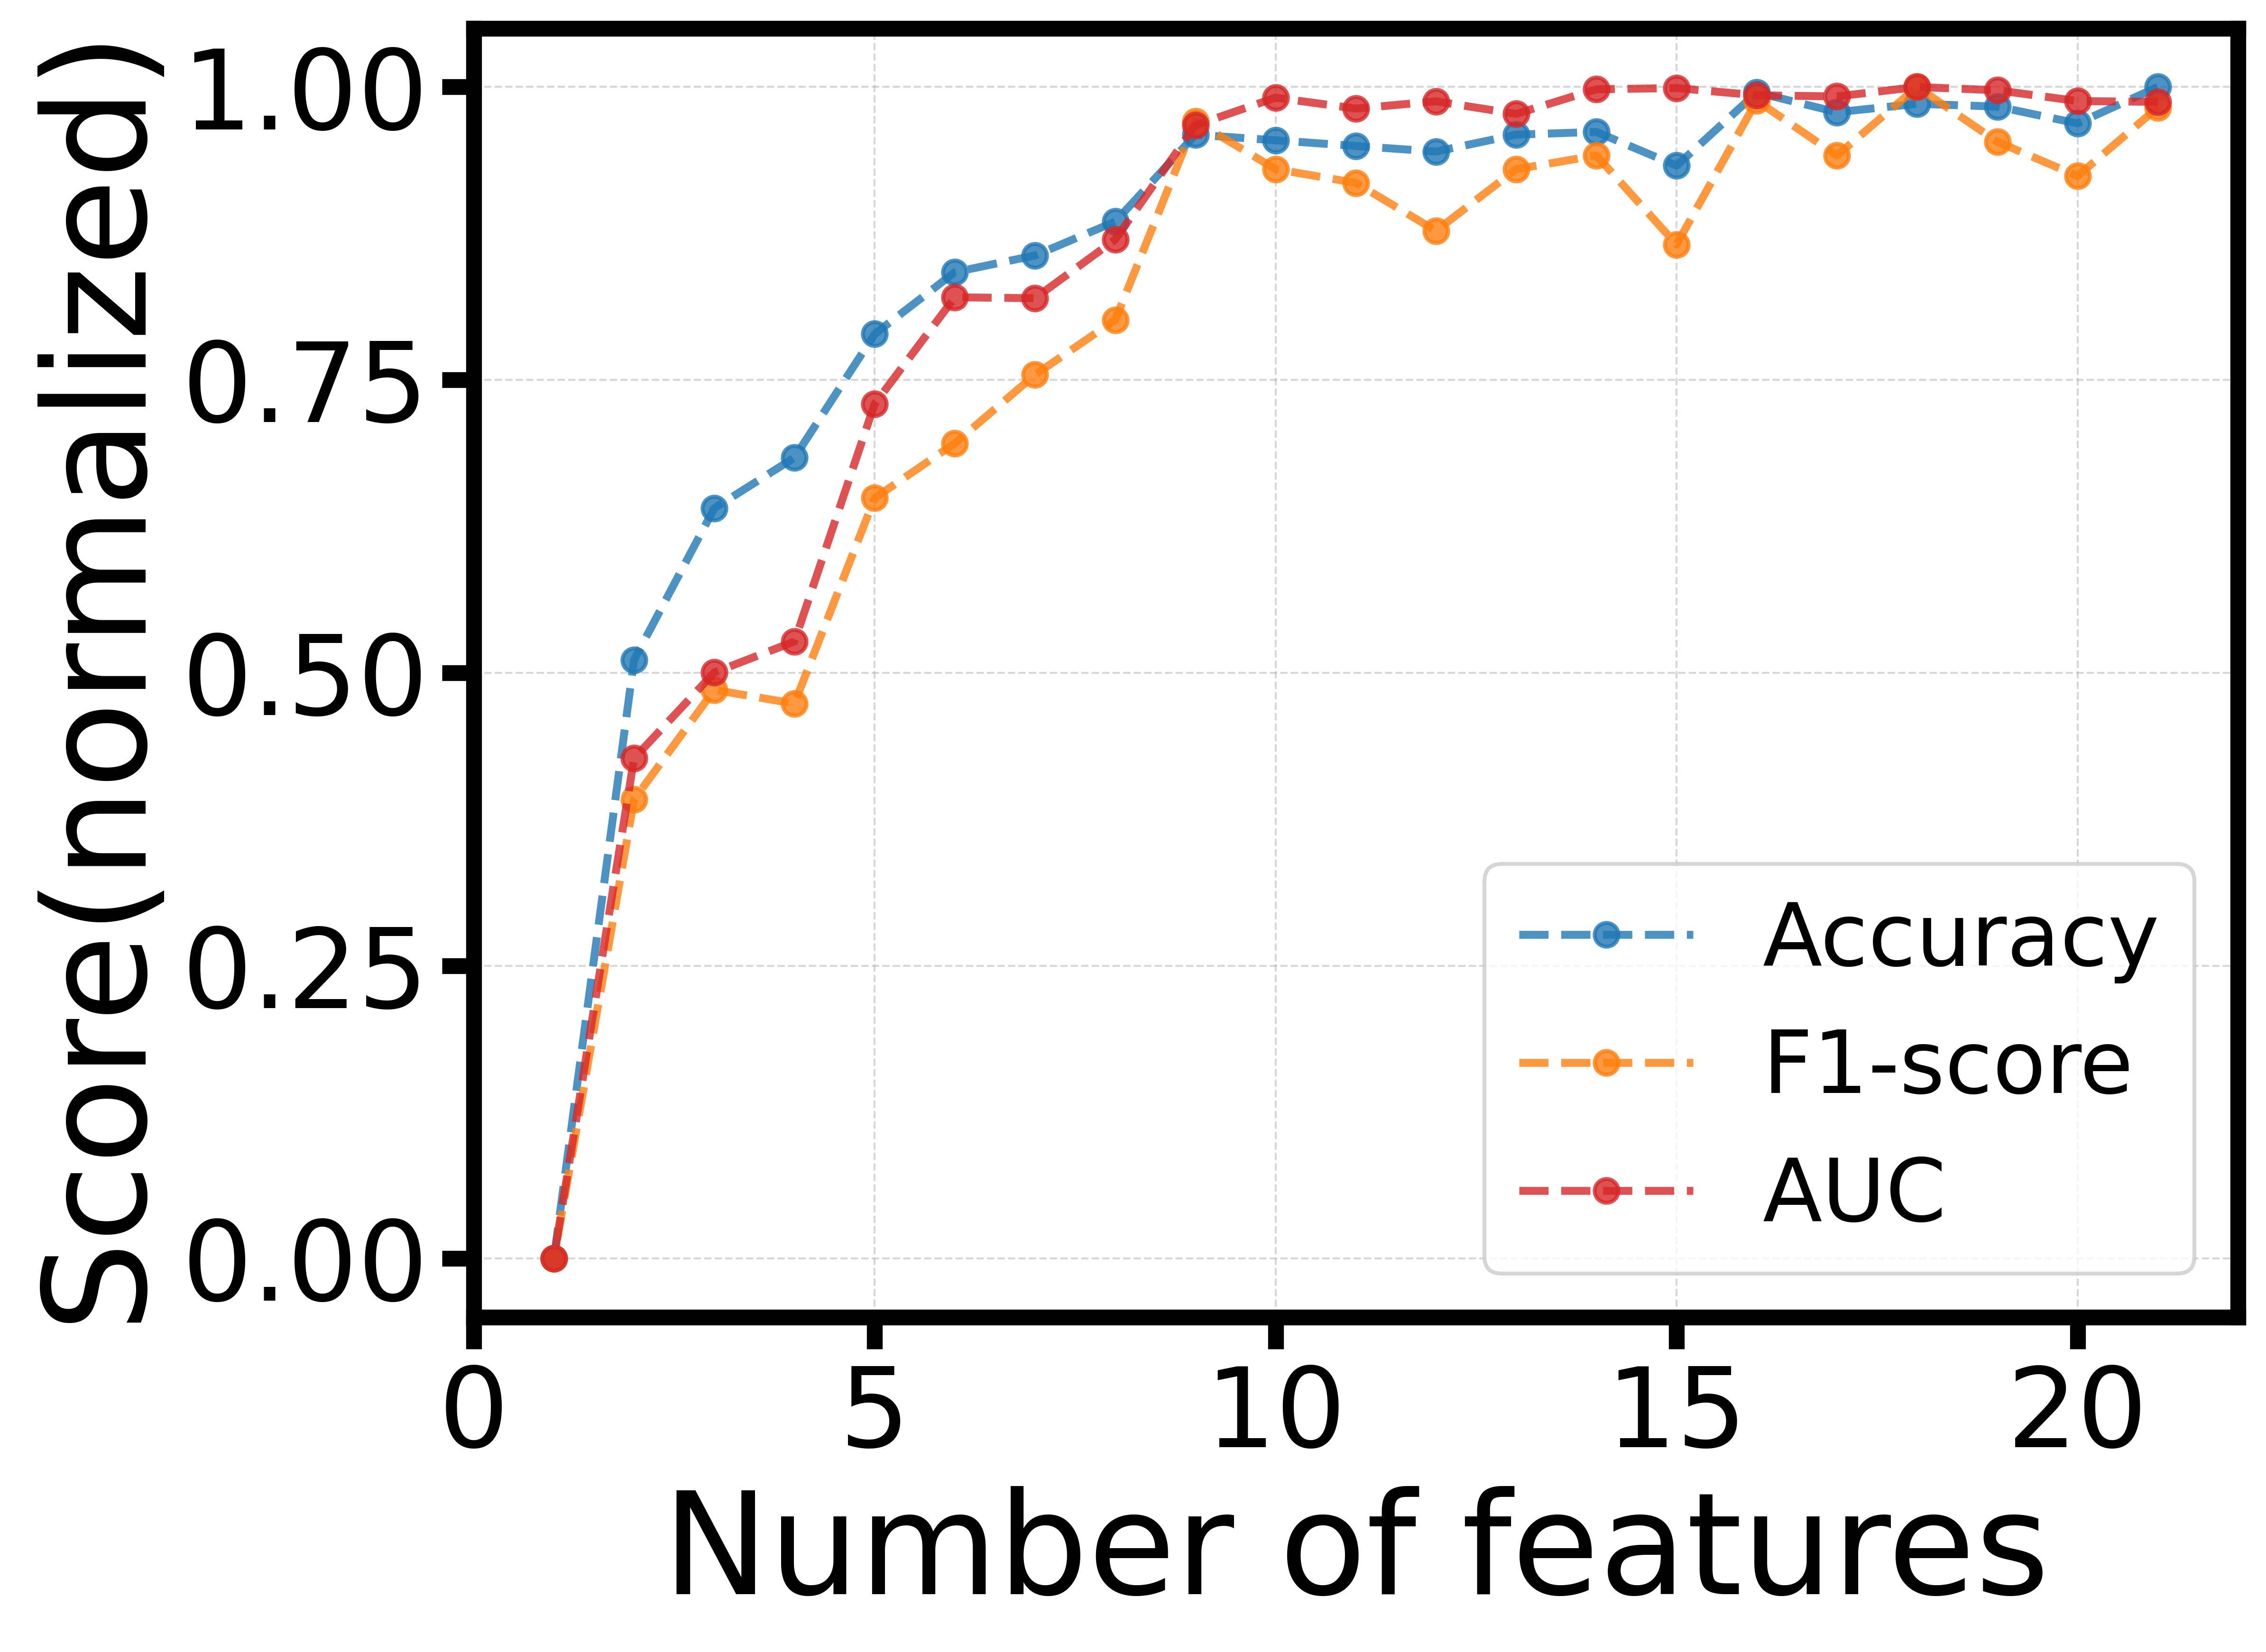

In [19]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Accuracy', 'F1-score', 'AUC']
df_feature = result
normalized_df = df_feature[columns_to_normalize]

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(normalized_df)
df_feature[columns_to_normalize] = normalized_data

f_fig, f_ax = plt.subplots(figsize=(8, 6), dpi=600)
colors = {'Accuracy': '#1f77b4', 'F1-score': '#ff7f0e', 'AUC': '#d62728'} 
scores_list = ["Accuracy","F1-score","AUC"]
for score in scores_list:
    f_ax.plot(n_features,result[score],linestyle='--',marker='o',alpha=0.8,linewidth=2,label=score,color=colors[score])  #color='black'

f_ax.set_xlabel("Number of features",fontsize=36), plt.ylabel("Score(normalized)",fontsize=36)
f_ax.legend(loc="lower right")
plt.legend( fontsize=22)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(4) 
ax.tick_params(axis='both', which='major', labelsize=28, width =4, length=8)
plt.show()

In [20]:
result.iloc[5,0]

Index(['Cell_architecture', 'Substrate_stack_sequence', 'ETL_stack_sequence',
       'ETL_additives_compounds', 'ETL_deposition_procedure',
       'Perovskite_composition_none_stoichiometry_components_in_excess',
       'Perovskite_additives_compounds', 'Perovskite_deposition_procedure',
       'DMF_DMSO', 'Perovskite_deposition_quenching_media',
       'HTL_stack_sequence', 'HTL_additives_compounds',
       'Backcontact_stack_sequence', 'Backcontact_thickness_list',
       'Perovskite_deposition_solvents_IPA',
       'Perovskite_deposition_thermal_annealing'],
      dtype='object')

In [21]:
best_features = ['Cell_architecture', 'Substrate_stack_sequence', 'ETL_stack_sequence',
       'ETL_additives_compounds', 'ETL_deposition_procedure',
       'Perovskite_composition_none_stoichiometry_components_in_excess',
       'Perovskite_additives_compounds', 'Perovskite_deposition_procedure',
       'DMF_DMSO', 'Perovskite_deposition_quenching_media',
       'HTL_stack_sequence', 'HTL_additives_compounds',
       'Backcontact_stack_sequence', 'Backcontact_thickness_list',
       'Perovskite_deposition_solvents_IPA',
       'Perovskite_deposition_thermal_annealing']

In [22]:
scores_2 = sampling_strategy_scores(models=classifiers, X=X[best_features], y=y, n=10, names=names, sampling='smote', strategy_u=0.38, strategy_o=0.93)[0]
scores_2

,model,accuracy,f1-score,mcc,recall,precision,roc_auc
0,LR,0.681779,0.515,0.298655,0.620,0.444,0.710035
1,DT,0.754832,0.572,0.402486,0.596,0.552,0.707732
2,RF,0.805939,0.634,0.504973,0.615,0.658,0.848712
3,LGBM,0.796510,0.619,0.480652,0.604,0.636,0.849105
4,ET,0.781943,0.592,0.443449,0.572,0.611,0.822602
5,XGB,0.798078,0.624,0.486347,0.607,0.642,0.848982


# Hyperparameter Optimization

## RF

In [23]:
def optuna_objective(trial): 
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
   
    rf = RandomForestClassifier(n_estimators=n_estimators,
                                 criterion=criterion,
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 max_features=max_features,
                                 bootstrap=bootstrap,
                                 n_jobs=20,
                                 random_state=seed)    
    result=sampling_strategy_model(model=rf, X=X[best_features], y=y, n=10, sampling='smote', strategy_u=0.38, strategy_o=0.93)[0]

    return result["mcc"]

In [24]:
def optimizer_optuna(n_trials, algo):
    
    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP',
                                          'n_initial_points':10, 
                                          'acq_func':'EI'} 
                           )
    
    study = optuna.create_study(sampler = algo 
                                , direction="maximize" # The direction of optimization can be filled in as' minimize 'or' maximize '
                               )

    study.optimize(optuna_objective 
                   , n_trials=n_trials 
                   , show_progress_bar=True 
                  )

    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

In [25]:
optuna.logging.set_verbosity(optuna.logging.ERROR) 
rf_best_params, rf_best_score = optimizer_optuna(200,"TPE")

  0%|          | 0/200 [00:00<?, ?it/s]


 
 best params:  {'n_estimators': 218, 'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False} 
 
 best score:  [0.5150564788350935] 



## LGBM

In [26]:
def optuna_objective(trial): 

    n_estimators = trial.suggest_int('n_estimators',100, 300)  
    max_depth = trial.suggest_int('max_depth', 5, 30) 
    learning_rate = trial.suggest_categorical('learning_rate',[0.01,0.015,0.025,0.05,0.1,0.15,0.2]) 
    min_split_gain = trial.suggest_float('min_split_gain',0, 1,step=0.05) 
    subsample = trial.suggest_float('subsample', 0.5, 1.0,step=0.01) 
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0,step=0.01)  

    lgbm = LGBMClassifier(n_estimators=n_estimators, 
                           max_depth=max_depth,
                           learning_rate=learning_rate,
                           objective='binary',
                           min_split_gain=min_split_gain,
                           subsample=subsample,
                           colsample_bytree=colsample_bytree,
                           verbose=-1,
                           n_jobs=20,
                           seed=42 
                          )

    result=sampling_strategy_model(model=lgbm, X=X[best_features], y=y, n=10, sampling='smote', strategy_u=0.38, strategy_o=0.93)[0]

    return result["mcc"]

In [27]:
def optimizer_optuna(n_trials, algo):

    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP', 
                                          'n_initial_points':10, 
                                          'acq_func':'EI'}
                           )
    
    study = optuna.create_study(sampler = algo 
                                , direction="maximize" 
                               )

    study.optimize(optuna_objective 
                   , n_trials=n_trials 
                   , show_progress_bar=True 
                  )

    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

In [28]:
optuna.logging.set_verbosity(optuna.logging.ERROR) 
lgbm_best_params, lgbm_best_score = optimizer_optuna(200,"TPE")

  0%|          | 0/200 [00:00<?, ?it/s]


 
 best params:  {'n_estimators': 192, 'max_depth': 27, 'learning_rate': 0.2, 'min_split_gain': 0.35000000000000003, 'subsample': 0.78, 'colsample_bytree': 0.56} 
 
 best score:  [0.5110374409439491] 



## ET

In [29]:
def optuna_objective(trial): 
    n_estimators = trial.suggest_int('n_estimators', 100, 300, step=1)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
   
    etc = ExtraTreesClassifier(n_estimators=n_estimators,
                               criterion=criterion,
                               max_depth=max_depth,
                               min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf,
                               max_features=max_features,
                               random_state=seed,
                              n_jobs=-1)    
    
    result=sampling_strategy_model(model=etc, X=X[best_features], y=y, n=10, sampling='smote', strategy_u=0.38, strategy_o=0.93)[0]
    return result["mcc"]

In [30]:
def optimizer_optuna(n_trials, algo):

    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP', 
                                          'n_initial_points':10, 
                                          'acq_func':'EI'} 
                           )
    
    study = optuna.create_study(sampler = algo 
                                , direction="maximize" 
                               )

    study.optimize(optuna_objective 
                   , n_trials=n_trials 
                   , show_progress_bar=True 
                  )
    
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

In [31]:
optuna.logging.set_verbosity(optuna.logging.ERROR) 
et_best_params, et_best_score = optimizer_optuna(200,"TPE")

  0%|          | 0/200 [00:00<?, ?it/s]


 
 best params:  {'n_estimators': 224, 'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'auto'} 
 
 best score:  [0.49183765195939594] 



## XGB

In [32]:
def optuna_objective(trial): 
    param_space = {
        'eta': trial.suggest_loguniform('eta', 0.001, 0.1), 
        'max_depth': trial.suggest_int('max_depth', 2, 30),  
        'gamma': trial.suggest_loguniform('gamma', 0.01, 1.0),  
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10), 
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0), 
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),  
    }
    xgb = xgboost.XGBClassifier(random_state=42,**param_space)  
    result=sampling_strategy_model(model=xgb, X=X[best_features], y=y, n=10, sampling='smote', strategy_u=0.38, strategy_o=0.93)[0]

    return result["mcc"]

In [33]:
def optimizer_optuna(n_trials, algo):

    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP',
                                          'n_initial_points':10, 
                                          'acq_func':'EI'} 
                           )
    
    study = optuna.create_study(sampler = algo 
                                , direction="maximize" 
                               )

    study.optimize(optuna_objective 
                   , n_trials=n_trials 
                   , show_progress_bar=True 
                  )
    
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

In [34]:
optuna.logging.set_verbosity(optuna.logging.ERROR)
xgb_best_params, xgb_best_score = optimizer_optuna(200,"TPE")

  0%|          | 0/200 [00:00<?, ?it/s]


 
 best params:  {'eta': 0.03900147523736077, 'max_depth': 11, 'gamma': 0.06486320019046317, 'min_child_weight': 1, 'subsample': 0.9325039383745954, 'colsample_bytree': 0.5186716377998524} 
 
 best score:  [0.5389289379488311] 



## Performance

In [37]:
rf = RandomForestClassifier(n_estimators=184,
                             criterion='gini',
                             max_depth=18,
                             min_samples_split=2,
                             min_samples_leaf=2,
                             max_features='sqrt',
                             bootstrap=False,
                             n_jobs=-1,
                             random_state=seed) 
lgbm = LGBMClassifier(n_estimators=148, 
                       max_depth=12,
                       learning_rate=0.05,
                       objective='binary',
                       min_split_gain=0.45,
                       subsample=0.61,
                       colsample_bytree=0.62,
                       verbose=-1,
                       n_jobs=20,
                       seed=42 
                      )
etc = ExtraTreesClassifier(n_estimators=213,
                           criterion='entropy',
                           max_depth=10,
                           min_samples_split=3,
                           min_samples_leaf=3,
                           max_features=None,
                           random_state=42,
                           n_jobs=20) 

xgb = xgboost.XGBClassifier(eta = 0.038816566174682765,
                           max_depth = 10,
                           gamma = 0.22333749634570235, 
                           min_child_weight = 1,
                           subsample = 0.9480060645299058,
                           colsample_bytree = 0.5382666931937315,
                           random_state=42)

names_HO = [
            "Random Forest",
            "LGBM",
            "ExtraTrees",
            "XGBoost",
        ]
classifiers_HO = [
            rf,
            lgbm,
            ext,
            xgb,
        ]

In [38]:
scores_3 = sampling_strategy_scores(models=classifiers_HO, X=X[best_features], y=y, n=10, names=names_HO, sampling='smote', strategy_u=0.38, strategy_o=0.93)[0]
scores_3

,model,accuracy,f1-score,mcc,recall,precision,roc_auc
0,Random Forest,0.811660,0.650,0.523261,0.642,0.663,0.856120
1,LGBM,0.805898,0.641,0.508043,0.630,0.651,0.852625
2,ExtraTrees,0.781943,0.592,0.443449,0.572,0.611,0.822602
3,XGBoost,0.816871,0.661,0.536378,0.648,0.675,0.857750


# Voting

In [39]:
from sklearn.ensemble import VotingClassifier
import optuna
names = [
    "Random Forest",
    "XGBoost"
]
classifiers = [
    rf,
    xgb
]
def get_voting_weights(models,X,y,names,n_trials=100):
    def get_model(**params):
        weights=list(params.values())
        return VotingClassifier(estimators=[(name, model) for name, model in zip(names, models)],
                                        voting='soft', weights=weights)
    
    
    def objective(trial):
        params = {}
        for i in range(len(models)):
            params['weights_%s'%i] = trial.suggest_float('weights_%s'%i, 0, 1)
        model = get_model(**params)
        # single model scores
        result = sampling_strategy_model(model, X=X, y=y, n=10, sampling='smote', strategy_u=0.38, strategy_o=0.93)[0]    
        return result['roc_auc']
    
    def get_init_param():
        # models scores
        result = sampling_strategy_scores(models=models, X=X, y=y, n=10, names=names, sampling='smote',  strategy_u=0.38, strategy_o=0.93)[0]
        scores = result['roc_auc'].values
        score_sum = sum(scores)
        weights = [x/score_sum for x in scores]
        init_param = {}
        for i,x in zip(range(len(models)),weights):
            init_param['weights_%s'%i] = x
        return init_param

    study = optuna.create_study(direction='maximize',load_if_exists=get_init_param())
    study.optimize(objective, n_trials=n_trials,n_jobs=12)

    best_params = study.best_params
    
    return list(best_params.values())

In [40]:
weights = get_voting_weights(classifiers,X[best_features],y,names,n_trials=100)

In [42]:
voting_names = [
    "Random Forest",
    "XGBoost"
]
voting_classifiers = [
    rf,
    xgb
]
voting_clf =  VotingClassifier(estimators=[(name, model) for name, model in zip(voting_names, voting_classifiers)],
                                        voting='soft', weights=[0.47286297402402977, 0.5310360184667748])

In [43]:
names_v = [
            "Random Forest",
            "LGBM",
            "ExtraTrees",
            "XGBoost",
            "Voting"
        ]
classifiers_v = [
            rf,
            lgbm,
            ext,
            xgb,
            voting_clf
        ]

In [44]:
scores_4 = sampling_strategy_scores(models=classifiers_v, X=X[best_features], y=y, n=10, names=names_v, sampling='smote',  strategy_u=0.38, strategy_o=0.93)[0]
scores_4

,model,accuracy,f1-score,mcc,recall,precision,roc_auc
0,Random Forest,0.811660,0.650,0.523261,0.642,0.663,0.856120
1,LGBM,0.805898,0.641,0.508043,0.630,0.651,0.852625
2,ExtraTrees,0.781943,0.592,0.443449,0.572,0.611,0.822602
3,XGBoost,0.816871,0.661,0.536378,0.648,0.675,0.857750
4,Voting,0.813234,0.655,0.528711,0.646,0.668,0.861233
